# Гиперпараметры и проверка модели

## Соображения относительно проверки модели

После выбора модели и гиперпараметров необходимо оценить ее эффективность, это можно сдлеать сравнив предсказания с известными значениями.

### Плохой способ проверки модели

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

Выберем теперь модель и гиперпараметры:

Будем использовать в этом примере классификатор на основе метода *k*-средних с ``n_neighbors=1``.

Это очень простая модель, которую можно описать фразой "Метка для неизвестной точки такая же, как и метка ближайшей к ней обучающей точки".

In [3]:
from sklearn.neighbors import KNeighborsClassifier # 1. Выбор класса модели

model = KNeighborsClassifier(n_neighbors=1)        # 2. Выбор гиперпараметров

In [4]:
model.fit(X, y)                                    # 3. Обучаем модель
y_model = model.predict(X)                         # 4. Предсказываем метки

In [5]:
# Вычисляем долю правильно маркированных точек
from sklearn.metrics import accuracy_score

accuracy_score(y, y_model)

1.0

Как видим показатель точности равен 100%, то есть наша модель правильно пометила 100% точек!

###### НО!

Действительно ли это правильная оценка ожидаемой точности?

Действительно ли нам попалась модель, которая будет работать правильно в 100% случаев?

###### НЕТ!

На самомо деле этот подход имеет ``фундаментальный изъян``:

###### Обучение и оценка модели выполняются на одних и тех же данных!

Более того, *модель ближайщего соседа* - оцениватель, работающий путем ``обучения на примерах (instance-based estimator)``, попросту сохраняющий обучающие данные и предсказывающий метки путем сравнения новых данных с сохраненными точками.

За исключением некоторых специально сконструированных случаев, его точность в этой задаче всегда будет 100%.

### Хороший способ проверки модели: отложенные данные

Для более точного выяснения рабочих характеристик модели воспользуемся ``Отложенными наборами данных (holdout sets)``, т.е. отложим некоторое подмножество данных из обучающей последовательности, после чего используем его для проверки качества работы модели.

Это можно сделать с помощью утилиты ``train_test_split()``

In [6]:
from sklearn.model_selection import train_test_split

# разделяем данные: по 50% в каждом из наборов
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

In [7]:
model.fit(X1, y1) # 3. Обучам модель

KNeighborsClassifier(n_neighbors=1)

In [8]:
y2_model = model.predict(X2) # 4. предсказываем данные
accuracy_score(y2, y2_model) # Оцениваем работу модели на другом наборе

0.9066666666666666

### Перекрестная проверка модели

Потеря части данных для обучения модели - один из недостатков использования отложенного набора данных для проверки модели.
Это неоптимально и может стать причиной проблем, *особенно если исходный набор данных невелик*.

Один из способов решения этой проблеммы - ``перекрестная проверка (cross-validation)``, то есть выполнение последовательности апроксимаций, в которых каждое подмножество данных используется как в качестве *обучающей* последовательности, так и в качестве *проверочного* набора.

In [9]:
y2_model = model.fit(X1, y1).predict(X2) # взяли для обучения 1ю часть, и предсказываем 2ю
y1_model = model.fit(X2, y2).predict(X1) # взяли для обучения 2ю часть, и предсказываем 1ю

In [10]:
# получаем две оценки точности
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

Полученные 2 оценки точности можно обобщить (например взяв среднее).

Этот вид перекрестной проверки называется ``двухблочной перекрестной проверкой (two-fold cross-validation)``

Можно распространить эту идею на случай большего числа попыток и большего количества блоков данных, например *пятиблочная перекрестная проверка*. Делать это вручную довольно утомительно, для этого существует убобная утилита ``cross_val_score``

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Библиотека Scikit-Learn реализует множество схем перекрестной проверки, удобных в определенных  конкретныъ случаях. Они реализованы в модуле ``model_selection``.

Рассмотрим предельный случай, для которого ``кол-во блоков = кол-ву точек данных`` и обучаем модель при каждой попытке на всех точках кроме одной. Такой тип перекрестной проверки известен под названием ``перекрестной проверки по отдельным объектам (one-out cross-validation)``:

In [12]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Перекрестная проверка по всем 150 попытам, причем каждый результат либо правильный 1 либо нет 0.

Среднее значение этих результатов дает нам оценко частоты ошибок:

In [13]:
scores.mean()

0.96

In [14]:
# from sklearn import model_selection
# можно глянуть какие еще существуют проверки
# https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
# https://scikit-learn.ru/category/model-selection/
# model_selection.

## Выбор оптимальной модели
- один из наиболее важных аспектов машинного обучения.

Важнейшим является следующий вопрос:
###### Что делать, если наш оцениватель показывает недостаточно хорошие результаты?

- использовать более сложную/гибкую модель;
- применять менее сложную/гибкую модель;
- собрать больше выборок для обучения;
- собрать больше данных для добавления новых признаков к каждой заданной выборке.

Ответ на этот вопрос зачастую парадоксален. В частности, иногда использование более сложной модели приводит к худшим резултатам, а добавление новых выборок для обучения не приводит к их улучшению!

*Успешных специалистов в области машинного обучения как раз и отличает умение определять, какие действия улучшат характеристики модели.*

### Компромис между систематической ошибкой и дисперсией

По существу, выбор "оптимальной модели" состоит в поиске наилучшего компромиса между ``систематической ошибкой (bias)`` и ``дисперсией (variance)``.

![](PythonDataScienceHandbook-2/notebooks_v2/figures/05.03-bias-variance.png)


Примерно так выглядят:

1. Модели со значительной систематической ошибкой: недообученные модели
2. Модели с высокой дисперсией: переобученные модели

Очевидно, что обе эти модели не слишком хорошо аппроксимируют наши данные, но проблемы с ними различны.

![](PythonDataScienceHandbook-2/notebooks_v2/figures/05.03-bias-variance-2.png)

Красные точки - исключенные из обучающей последовательности данные.

В качестве оценки эффективности здесь используестя $R^2$.

$R^2$ - ``коэффициент детермининта`` или ``коэффициент смешанной корреляции``

Он представляет собой меру того, насколько хорошо модель работает по сравнению с простым средним значением целевых величин.

- $R^2$ = 1 означает идеальное совпадение
- $R^2$ = 0 показывает, что модель оказалась ничем не лучше простого среднего значения данных
- $R^2$ < 0 указывают на модели, которые работают еще хуже

https://en.wikipedia.org/wiki/Coefficient_of_determination
https://ru.wikipedia.org/wiki/Коэффициент_детерминации

``Коэффициент детерминации`` ($R^2$ — R-квадрат) — это ``доля дисперсии зависимой переменной``, ``объясняемая`` рассматриваемой моделью зависимости, то есть ``объясняющими переменными``. Более точно — это *единица минус доля необъяснённой дисперсии* (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. 

Его рассматривают как универсальную меру зависимости одной случайной величины от множества других. В частном случае линейной зависимости $R^2$ является квадратом так называемого множественного коэффициента корреляции между зависимой переменной и объясняющими переменными. В частности, для модели парной линейной регрессии коэффициент детерминации равен квадрату обычного коэффициента корреляции между y и x.

На основе оценок эффективности двух моделей выше, мы можем сделать следующие обобщенное наблюдение:

- Для моделей со значительной систематической ошибкой эффективность модели на проверочном наборе данных сопоставима с ее эффективностью на обучающей последовательности.
- Для моделей с высокой дисперсией эффективность модели на проверочном наборе данных существенно хуже ее эффективности на обучающей последовательности.

![](PythonDataScienceHandbook-2/notebooks_v2/figures/05.03-validation-curve.png)

Показанный на рисунке график часто называют ``кривой проверки (validation curve)``. На нем можно наблюдать следующие важные особенности:

- Оценка эффективности для обучения всегда превышает оценку эффективности для проверки. Это логично: модель лучше подходит для данных которые она уже видела, чем для тех, которые она еще не видела.

- Модели с очень низкой сложностью (со значительной систематической ошибкой) являются недообученными, то есть эти модели будут плохо предсказывать как данные обучающей последовательность, так и любые ранее не виденные ими данные.

- Модели с очень высокой сложностью (с высокой дисперсией) являются переобученными, то есть будут очень хорошо предсказывать данные обучающей последовательности, но на любых ранее не виденных данных работать очень плохо.

- Кривая проверки достигает максимума в какой-то промежуточной точке. Этот уровень сложности означает приемлемый компромис между ``систематической ошибкой (bias)`` и ``дисперсией (variance)``.

Средства регулирования сложности модели различаются в зависимости от модели.

### Кривые проверки в библиотеке Scikit-Learn

Рассмотрим пример перекрестной проверки для расчета кривой проверки для класса моделей. Используем ``модель полиномиальной регрессии (polynomial regression model)``: это обобщенная линейная модель с параметризованной степенью многочлена.

1я степень $a$ и $b$
$$
y = ax + b
$$

3я степень $a, b, c, d$
$$
y = ax^3 + bx^2 + cx + d
$$

Это можно обобщить на любое кол-во полиномиальных признаков.

В библиотеке SKL реализовать это можно с помощью простой линейной регрессии в сочетании с полиномиальным препроцессором.

Воспользуемся ``конвейером (pipeline)`` для соединения этих операций в единую цепочку.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [16]:
# теперь создадим данные на которых будем обучать нашу модель
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # Создаем случайные выборки данных
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [17]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [18]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

In [19]:
X_test.shape

(500, 1)

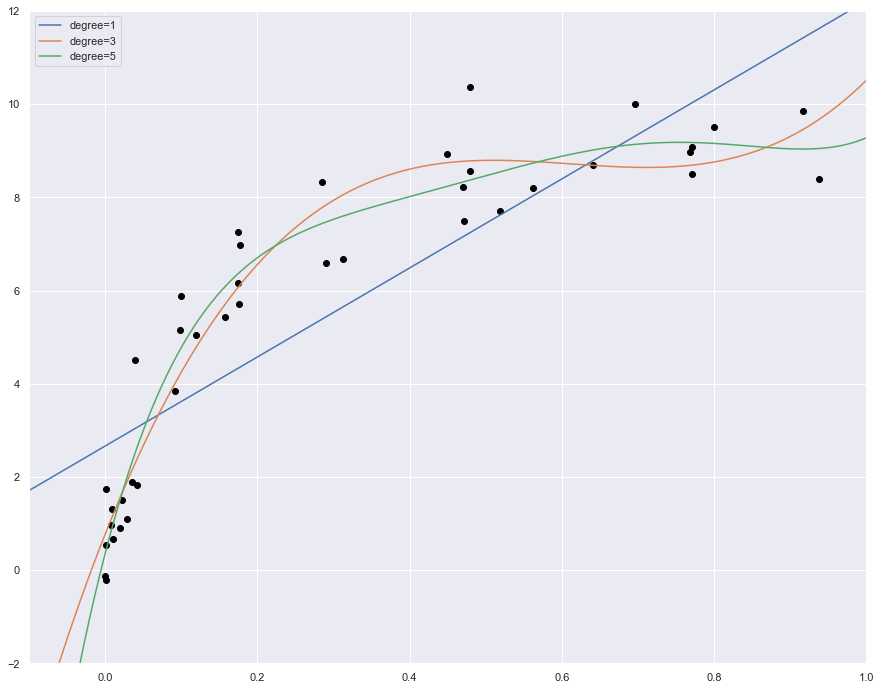

In [20]:
plt.figure(figsize=(15, 12))
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f'degree={degree}')

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

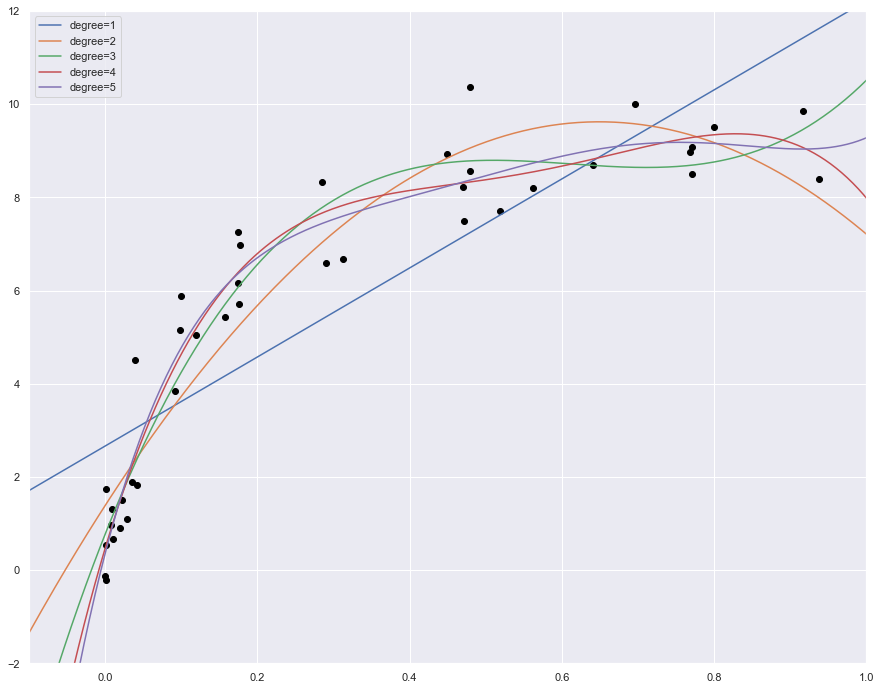

In [21]:
plt.figure(figsize=(15, 12))
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 2, 3, 4, 5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f'degree={degree}')

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

###### Параметром, служащим для управления сложности модели служит степень многочнена

Следует задать вопрос: какая степень многочлени обеспечивает подходящий компромисс между ``систематической ошибкой (недообучение)`` и ``дисперсией (переобучение)``?

Чтобы решить этот вопрос, визуализируем кривую проверки для этих конкретных данных и моделей.

Проще всего это сделать с помощью утилиты ``validation_curve``, получающей на входе:
- модель, 
- данные, 
- название параметра, 
- диапазон для анализа
автоматически вычисляет в этом диапазоне значения:
- оценки эффективности для обучения
- оценки эффективности для проверки

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'Оценка')

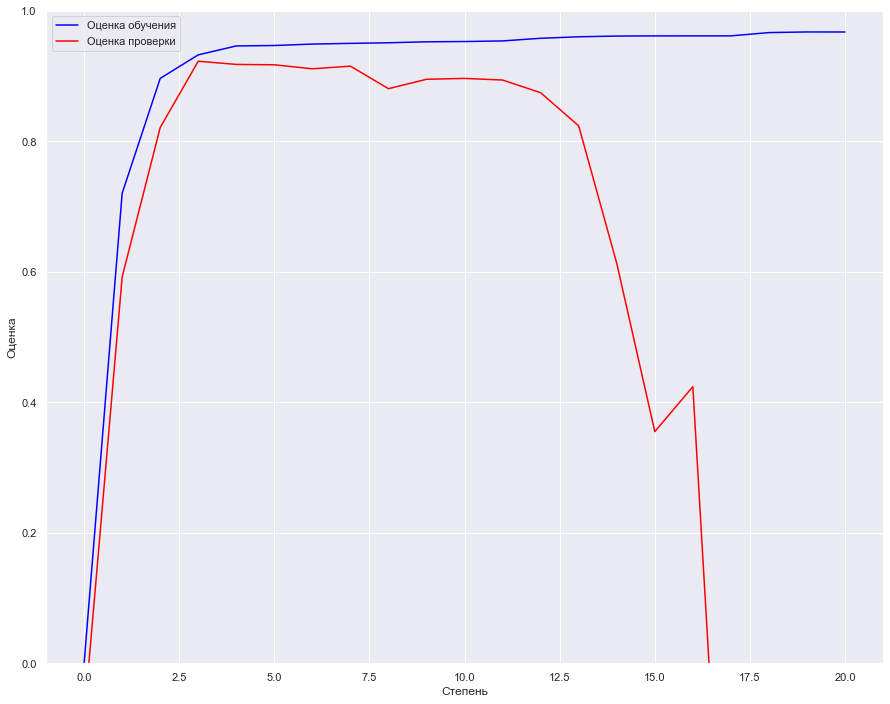

In [22]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X,
                                          y,
                                          'polynomialfeatures__degree',
                                          degree,
                                          cv=7)

plt.figure(figsize=(15, 12))
plt.plot(degree, np.median(train_score, 1), color='blue', label='Оценка обучения')
plt.plot(degree, np.median(val_score, 1), color='red', label='Оценка проверки')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Степень')
plt.ylabel('Оценка')

In [23]:
# validation_curve?
# validation_curve(
#     estimator,
#     X,
#     y,
#     *,
#     param_name,
#     param_range,
#     groups=None,
#     cv=None,
#     scoring=None,
#     n_jobs=None,
#     pre_dispatch='all',
#     verbose=0,
#     error_score=nan,
#     fit_params=None,
# )

Text(0, 0.5, 'Оценка')

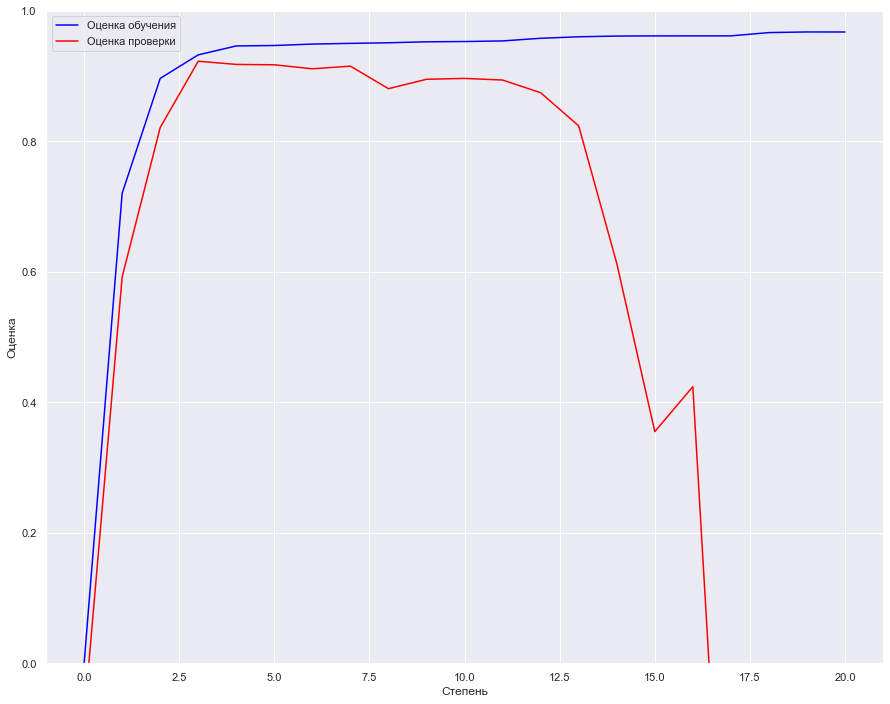

In [24]:
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X,
                                          y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,
                                          cv=7)

plt.figure(figsize=(15, 12))
plt.plot(degree, np.median(train_score, 1), color='blue', label='Оценка обучения')
plt.plot(degree, np.median(val_score, 1), color='red', label='Оценка проверки')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Степень')
plt.ylabel('Оценка')

Как можно понять из приведенной кривой максимальная эффективность достигается многочленом третьей степени.

# Кривые обучения

Важный нюанс сложности модели состоит в том, что *оптимальность модели обычно зависит от размера обучающей последовательности*.

Сгенерируем новый набор данных обучающей последовательности с в 5 раз большим количеством точек

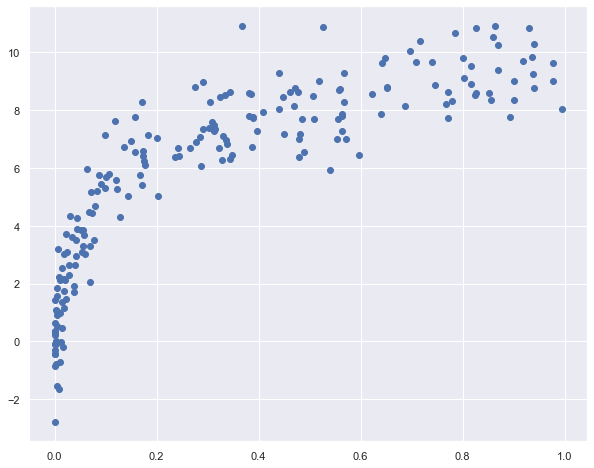

In [25]:
X2, y2 = make_data(200)
plt.figure(figsize=(10, 8))
plt.scatter(X2.ravel(), y2)   # np.ravel() возвращает сжатую до одной ОСИ последовательность

# X2 -> array([[1.73907352e-01],
#              [5.18867376e-01],
#              [1.30815988e-08],...

# X2.ravel() -> array([1.73907352e-01, 5.18867376e-01, 1.30815988e-08, 9.14049845e-02,
#                      2.15372915e-02, 8.52641608e-03, 3.46928663e-02, 1.19412216e-01,...

Text(0, 0.5, 'Оценка')

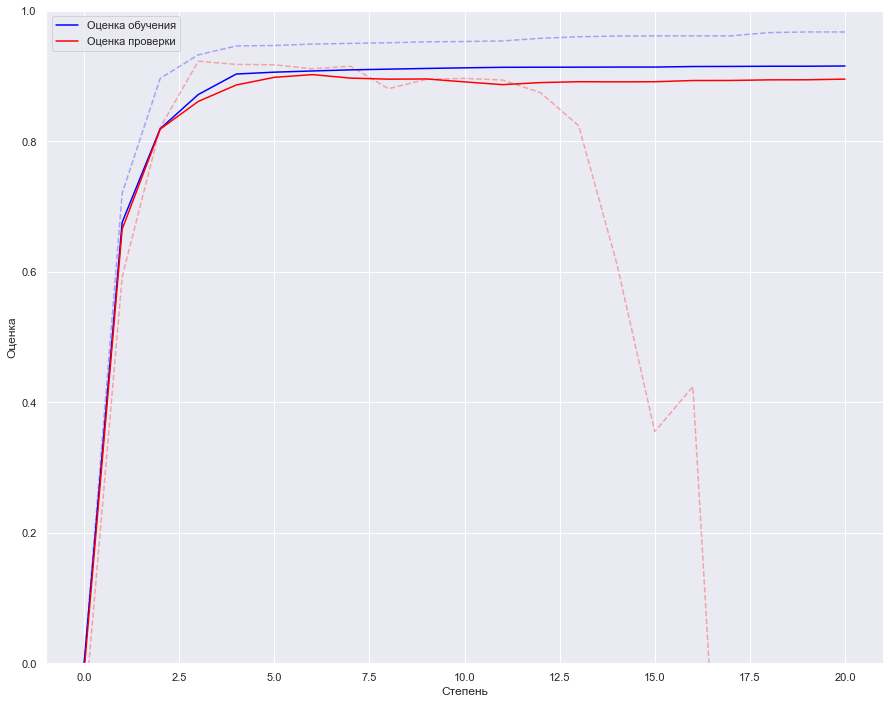

In [26]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            param_name='polynomialfeatures__degree',
                                            param_range=degree,
                                            cv=7)

plt.figure(figsize=(15, 12))
plt.plot(degree, np.median(train_score2, 1), color='blue', label='Оценка обучения')
plt.plot(degree, np.median(val_score2, 1), color='red', label='Оценка проверки')
plt.plot(degree, np.median(train_score, 1), color='blue', linestyle='dashed', alpha=0.3)
plt.plot(degree, np.median(val_score, 1), color='red', linestyle='dashed', alpha=0.3)

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Степень')
plt.ylabel('Оценка')

Максимум находится в степени 6, но даже при степени 20 модель не выглядит сильно переобученной.

###### Таким образом, мы видим, что поведение кривой проверки зависит не от одного, а от двух важных факторов: ``сложности модели`` и ``количества точек обучения``.

Бывает полезно исследовать поведение модели, как ф-ию от количества точек обучения. Сделать это можно путем использования постепенно увеличивающихся подмножеств данных для обучения модели.

График оценок для обучения/проверки с учетом размера обучающей последовательности известен под названием ``кривой обучения (learning curve)``.

###### Поведение ``кривой обучения (learning curve)`` должно быть следующим:

- Модель заданной сложности окажется ``переобученной`` на слишком маленьком наборе данных. Это значит, что *оценка эффективности для обучения* будет относительно высокой, а *оценка эффективности для проверки* - относительно низкой.

- Модель заданной сложности окажется ``недообученной`` на слишком большом наборе данных. Это значит, что *оценка эффективности для обучения* будет снижаться, а *оценка эффективности для проверки* - повышаться по мере роста размера набора данных.

- Модель никогда, разве что случайно, не покажет на проверочном наборе лучший результат, чем на обучающей последовательности. Это значит, что кривые будут сближаться, но никогда не пересекутся.

![](PythonDataScienceHandbook-2/notebooks_v2/figures/05.03-learning-curve.png)



Заметная особенность кривой обучения - сходимость к конкретному значению оценки при росте числа обучающих ваборок. В частности, если количество точек достигло значения,  при котором данная конкретная модель сошлась, то *добавление новых обучающих данных не поможет*! Единственный способом улучшить качество модели в таком случае будет использование другой (более сложной) модели.

###### Кривые обучения в библиотеке Scikit-Learn.

Scikit-Learn предоставляет удобные утилиты для вычисления кривых обучения моделей.

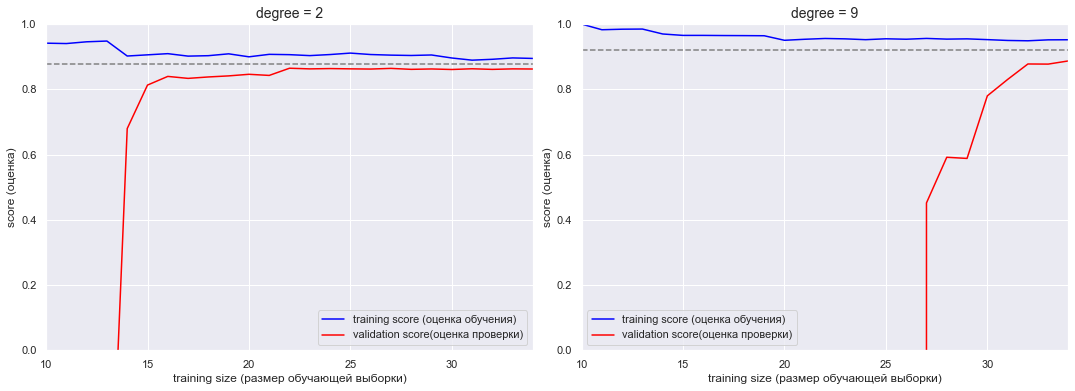

In [31]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score (оценка обучения)')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score(оценка проверки)')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size (размер обучающей выборки)')
    ax[i].set_ylabel('score (оценка)')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Кривые обучения наглядно показывают (особенно слева), реакцию модели на количество данных в обучающей выборке.

В частности (слева) после того момента, как кривая обучения уже сошлась к какома-то предельному значению *добавление дополнительных обучающих данных не улучшит аппроксимацию существенно!*

Единственный способ улучшить оценку уже сошедшейся кривой - использовать другую (более сложную) модель.

## Проверка на практике: поиск по сетке

На практике у моделей может быть больше одного параметра, поэтому графики кривых проверки и обучения превращаются из двумерных линий в *многомерные поверхности*.

Специальные инструменты для оценки эффективности предоставляет модуль ``model_selection``.

Рассмотрим трехмерную сетку признаков модели:
- степень многочлена
- флаг, указывающий, нужно ли подбирать точку пересечения с осью координат
- флаг, указывающий, следует ли выполнять нормализацию

Выполнить эти настройки можно с помощью метода ``GridSearchCV``.

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

# как и обычный оцениватель, grid еще не был применен к модели

In [33]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

###### После обучения можно узнать значения оптимальных параметров:

In [34]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

###### При необходимости можно воспользоваться этой оптимальной моделью и продемонстрировать апроксимацию

In [35]:
model = grid.best_estimator_

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

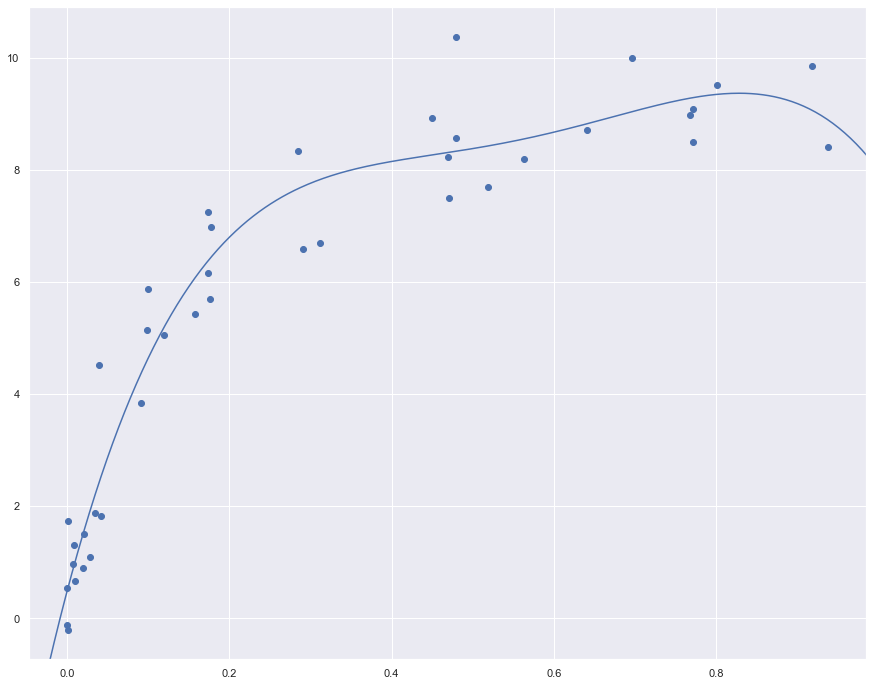

In [38]:
plt.figure(figsize=(15, 12))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)